In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pickle

In [2]:
def load_data(dir_path):
    file_path = dir_path.replace('\\', '/')
    data = sio.loadmat(file_path + '/trace_trial_stim.mat')
    
    stim_seq = data['stim_seq']
    stim_id = [i[0] for i in stim_seq]
    trace_by_trial = data['trace_by_trial']

    ncell = trace_by_trial.shape[0]
    nstim = len(np.unique(stim_id))
    ntrial = trace_by_trial.shape[1]
    nframe = trace_by_trial.shape[2]
    print(ncell, nstim, ntrial, nframe)

    return stim_id, trace_by_trial, # ncell, nstim, ntrial, nframe


def calc_trace_stim(trace_by_trial, stim_id):
    trace_avg_cell = np.mean(np.mean(trace_by_trial, axis=0), axis=0)
    trace_stim_avg = []
    # trace_stim_std = []
    # trace_stim_sem = []

    for i in np.unique(stim_id):
        trace_istim_avg = np.mean(trace_by_trial[:, np.where(stim_id == i)[0]], axis=1) # ncell x nframe
        trace_istim_avg = np.mean(trace_istim_avg, axis=0) # nframe
        # trace_istim_std = np.std(trace_by_trial[:, np.where(stim_id == i)[0]], axis=1)
        # trace_istim_sem = trace_istim_std / np.sqrt(len(np.where(stim_id == i)[0]))

        trace_stim_avg.append(trace_istim_avg)
        # trace_stim_std.append(trace_istim_std)
        # trace_stim_sem.append(trace_istim_sem)

    print(len(trace_stim_avg), trace_stim_avg[0].shape)
    return trace_avg_cell, trace_stim_avg

# compare trace

In [4]:
# i1369 V1 high res, cellpose
dir_path = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter\V1_i1369_220310_cellpose'
stim_id_cellpose, trace_by_trial_cellpose = load_data(dir_path)
trace_avg_cell_cellpose, trace_stim_avg_cellpose = calc_trace_stim(trace_by_trial_cellpose, stim_id_cellpose)

# i1369 V1 high res, manual
dir_path = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter\V1_i1369_220310'
stim_id_manual, trace_by_trial_manual = load_data(dir_path)
trace_avg_cell_manual, trace_stim_avg_manual = calc_trace_stim(trace_by_trial_manual, stim_id_manual)

114 30 511 156
30 (156,)
155 30 511 156
30 (156,)


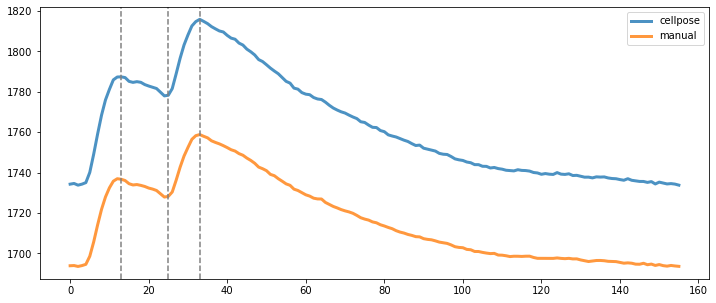

In [19]:
# try no normalization
plt.figure(figsize=(12, 5))

plt.plot(trace_avg_cell_cellpose, alpha=0.8, linewidth=3) # - 50
plt.plot(trace_avg_cell_manual, alpha=0.8, linewidth=3)

plt.axvline(x=np.argmax(trace_avg_cell_cellpose[:25]), color='gray', linestyle='--')
plt.axvline(x=np.argmin(trace_avg_cell_cellpose[25:30]) + 25, color='gray', linestyle='--')
plt.axvline(x=np.argmax(trace_avg_cell_cellpose), color='gray', linestyle='--')

plt.legend(['cellpose', 'manual'])
# plt.ylim([1600,1820])